In [6]:
pip install h3

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from imblearn.combine import SMOTEENN
import h3
import geopandas as gpd
import folium
import warnings
from shapely.geometry import Polygon
from flask import Flask, request, render_template
warnings.simplefilter(action="ignore")

import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [8]:
demographics = pd.read_csv("/content/sample_dataset_demographics.csv")
location = pd.read_csv("/content/sample_dataset_location.csv")
population = pd.read_csv("/content/sample_dataset_population.csv")
services = pd.read_csv("/content/sample_dataset_services.csv")
status = pd.read_csv("/content/sample_dataset_status.csv")

In [9]:
display(demographics,location,population,services,status)

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents
0,1608-GMEWB,Male,76,No,No,0
1,2817-LVCPP,Female,36,No,No,0
2,0997-YTLNY,Female,59,No,Yes,2
3,0526-SXDJP,Male,36,Yes,No,0
4,3466-RITXD,Male,34,No,No,0
...,...,...,...,...,...,...
7038,3500-NSDOA,Male,35,Yes,No,0
7039,4654-ULTTN,Male,34,Yes,No,0
7040,1506-YJTYT,Male,21,Yes,Yes,1
7041,1173-NOEYG,Female,25,Yes,No,0


,Customer ID,State,City,Zip Code,Latitude,Longitude
0,4299-OPXEJ,California,Inglewood,90301,33.956445,-118.358634
1,4656-CAURT,California,Phillipsville,95559,40.184094,-123.745487
2,5285-MVEHD,California,Sunnyvale,94087,37.351100,-122.037311
3,7481-ATQQS,California,Boulder Creek,95006,37.171727,-122.142961
4,1707-HABPF,California,Santa Barbara,93103,34.438581,-119.685368
...,...,...,...,...,...,...
7038,6754-WKSHP,California,Brisbane,94005,37.684694,-122.407120
7039,8650-RHRKE,California,Oakdale,95361,37.785033,-120.776141
7040,5419-JPRRN,California,Rough And Ready,95975,39.225634,-121.156163
7041,8966-OIQHG,California,Stanton,90680,33.801869,-117.995068


,Zip Code,Population
0,95366,"12,646"
1,95252,"11,266"
2,92241,"5,529"
3,95225,27
4,92341,317
...,...,...
1666,95970,495
1667,96054,386
1668,93235,"4,517"
1669,90058,"3,642"


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Home Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1240-HCBOH,No,0,67,None,Yes,43.30,Yes,No,None,...,No,Two Year,Yes,Credit Card,26.10,1759.55,0.00,0,2901.10,4660.65
1,3744-ZBHON,No,0,3,None,Yes,31.81,No,No,None,...,No,Month-to-Month,No,Bank Withdrawal,20.20,65.95,0.00,0,95.43,161.38
2,5989-PGKJB,No,0,16,Offer D,Yes,22.30,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,86.25,1340.10,0.00,0,356.80,1696.90
3,3585-ISXZP,No,0,8,None,Yes,29.66,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,No,Bank Withdrawal,95.65,778.10,0.00,0,237.28,1015.38
4,6728-DKUCO,Yes,1,72,Offer A,Yes,25.82,Yes,Yes,Fiber Optic,...,Yes,One Year,Yes,Bank Withdrawal,104.15,7303.05,0.00,0,1859.04,9162.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3557-HTYWR,No,0,47,None,Yes,45.67,Yes,Yes,DSL,...,Yes,Two Year,No,Credit Card,74.05,3496.30,0.00,0,2146.49,5642.79
7039,3320-VEOYC,No,0,14,None,Yes,37.62,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.60,1273.30,0.00,0,526.68,1799.98
7040,4075-JFPGR,Yes,2,51,Offer B,Yes,21.07,No,Yes,Fiber Optic,...,Yes,One Year,Yes,Bank Withdrawal,93.50,4619.55,0.00,0,1074.57,5694.12
7041,9450-TRJUU,No,0,35,None,Yes,41.21,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,No,Bank Withdrawal,83.15,2848.45,18.84,0,1442.35,4271.96


,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,3910-MRQOY,3,Stayed,0,NaN,NaN
1,0975-VOOVL,4,Joined,0,NaN,NaN
2,3146-JTQHR,5,Stayed,0,NaN,NaN
3,7767-UXAGJ,3,Churned,1,Competitor,Competitor made better offer
4,5849-ASHZJ,3,Stayed,0,NaN,NaN
...,...,...,...,...,...,...
7038,6516-NKQBO,4,Stayed,0,NaN,NaN
7039,0925-VYDLG,3,Churned,1,Attitude,Attitude of service provider
7040,4077-HWUYD,4,Stayed,0,NaN,NaN
7041,4732-RRJZC,3,Stayed,0,NaN,NaN


#Analysis on Demographic Data

In [10]:
len(demographics['Customer ID'].unique())

7043

In [11]:
demographics.dtypes

Customer ID             object
Gender                  object
Age                      int64
Married                 object
Dependents              object
Number of Dependents     int64
dtype: object

In [12]:
demographics.isnull().sum()

Customer ID             0
Gender                  0
Age                     0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

In [13]:
demographics.describe()

,Age,Number of Dependents
count,7043.000000,7043.000000
mean,46.509726,0.468692
std,16.750352,0.962802
min,19.000000,0.000000
25%,32.000000,0.000000
50%,46.000000,0.000000
75%,60.000000,0.000000
max,80.000000,9.000000


####Data analysis dashboards are available in Tableau
**Dashboard name** - Analysis on Demographic data

#Analysis on Location data

In [14]:
location

,Customer ID,State,City,Zip Code,Latitude,Longitude
0,4299-OPXEJ,California,Inglewood,90301,33.956445,-118.358634
1,4656-CAURT,California,Phillipsville,95559,40.184094,-123.745487
2,5285-MVEHD,California,Sunnyvale,94087,37.351100,-122.037311
3,7481-ATQQS,California,Boulder Creek,95006,37.171727,-122.142961
4,1707-HABPF,California,Santa Barbara,93103,34.438581,-119.685368
...,...,...,...,...,...,...
7038,6754-WKSHP,California,Brisbane,94005,37.684694,-122.407120
7039,8650-RHRKE,California,Oakdale,95361,37.785033,-120.776141
7040,5419-JPRRN,California,Rough And Ready,95975,39.225634,-121.156163
7041,8966-OIQHG,California,Stanton,90680,33.801869,-117.995068


In [15]:
location.dtypes

Customer ID     object
State           object
City            object
Zip Code         int64
Latitude       float64
Longitude      float64
dtype: object

In [16]:
location.isnull().sum()

Customer ID    0
State          0
City           0
Zip Code       0
Latitude       0
Longitude      0
dtype: int64

In [17]:
len(location['Customer ID'].unique())

7043

In [18]:
len(location['Zip Code'].unique())

1625

##### Data analysis is avaliable in Tableau Dashboard
**Dashboard name** - Analysis on Location data

#Analysis on Population

In [19]:
population

,Zip Code,Population
0,95366,"12,646"
1,95252,"11,266"
2,92241,"5,529"
3,95225,27
4,92341,317
...,...,...
1666,95970,495
1667,96054,386
1668,93235,"4,517"
1669,90058,"3,642"


In [20]:
population.dtypes

Zip Code       int64
Population    object
dtype: object

In [21]:
#Changing the dtype of population to numeric
population['Population'] = population['Population'].apply(lambda x: locale.atof(x))
population

,Zip Code,Population
0,95366,12646.0
1,95252,11266.0
2,92241,5529.0
3,95225,27.0
4,92341,317.0
...,...,...
1666,95970,495.0
1667,96054,386.0
1668,93235,4517.0
1669,90058,3642.0


In [22]:
len(population['Zip Code'].unique())

1671

#Analysis on Services

In [23]:
services.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Home Phone Service                    object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [24]:
len(services['Customer ID'].unique())

7043

In [25]:
services.isnull().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Home Phone Service                   0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges 

In [26]:
services.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


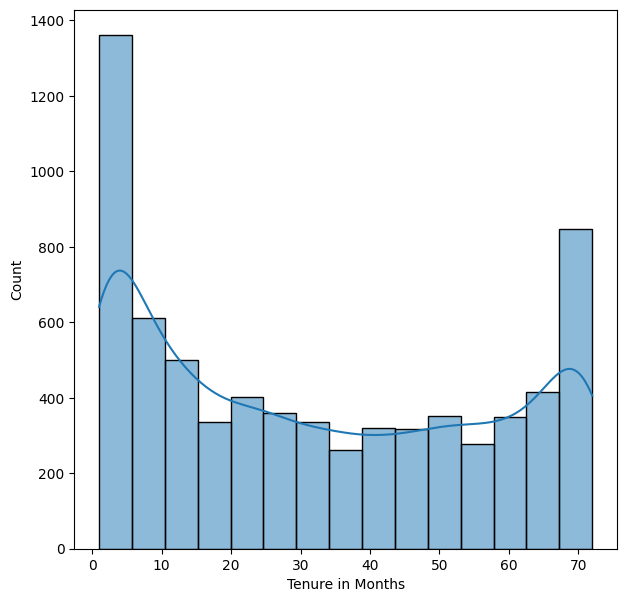

In [27]:
#Distribution of Tenure
plt.figure(figsize=(7,7))
sns.histplot(data=services,x=services['Tenure in Months'],kde=True)
plt.show()

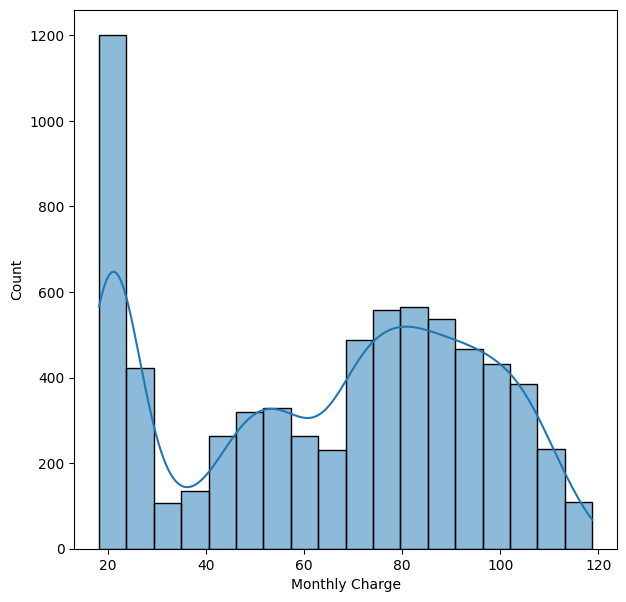

In [28]:
#Distribution of Tenure
plt.figure(figsize=(7,7))
sns.histplot(data=services,x=services['Monthly Charge'],kde=True)
plt.show()

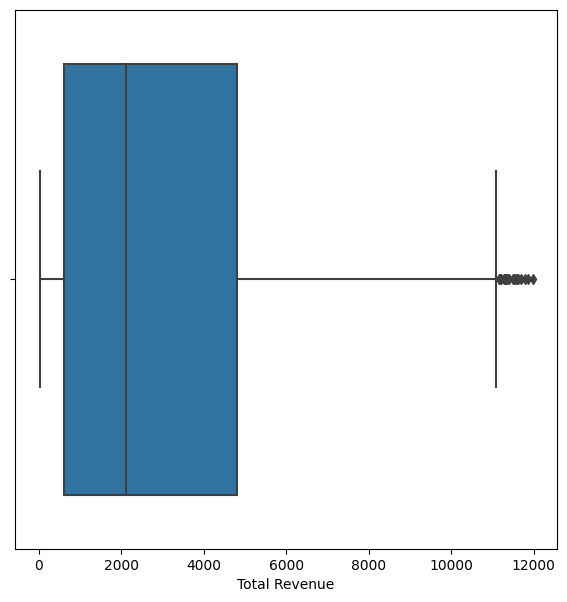

In [29]:
#Distribution of Tenure
plt.figure(figsize=(7,7))
sns.boxplot(x=services['Total Revenue'])
plt.show()

Complete Analysis can be found:

##### Dashboard name - Analysis on Services

# Analysis on Status

In [30]:
status

,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,3910-MRQOY,3,Stayed,0,NaN,NaN
1,0975-VOOVL,4,Joined,0,NaN,NaN
2,3146-JTQHR,5,Stayed,0,NaN,NaN
3,7767-UXAGJ,3,Churned,1,Competitor,Competitor made better offer
4,5849-ASHZJ,3,Stayed,0,NaN,NaN
...,...,...,...,...,...,...
7038,6516-NKQBO,4,Stayed,0,NaN,NaN
7039,0925-VYDLG,3,Churned,1,Attitude,Attitude of service provider
7040,4077-HWUYD,4,Stayed,0,NaN,NaN
7041,4732-RRJZC,3,Stayed,0,NaN,NaN


In [31]:
display(status['Satisfaction Score'].unique())
display(status['Customer Status'].unique())
display(status['Churn Value'].unique())
display(status['Churn Reason'].unique())
display(status['Churn Category'].unique())

array([3, 4, 5, 1, 2])

array(['Stayed', 'Joined', 'Churned'], dtype=object)

array([0, 1])

array([nan, 'Competitor made better offer',
       'Competitor offered higher download speeds', 'Price too high',
       'Attitude of support person', 'Competitor had better devices',
       'Long distance charges', 'Poor expertise of online support',
       'Network reliability', 'Moved', 'Competitor offered more data',
       'Service dissatisfaction', 'Poor expertise of phone support',
       'Extra data charges', 'Attitude of service provider', "Don't know",
       'Product dissatisfaction', 'Lack of self-service on Website',
       'Limited range of services',
       'Lack of affordable download/upload speed', 'Deceased'],
      dtype=object)

array([nan, 'Competitor', 'Price', 'Attitude', 'Dissatisfaction', 'Other'],
      dtype=object)

In [32]:
status['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [33]:
status.isnull().sum()

Customer ID              0
Satisfaction Score       0
Customer Status          0
Churn Value              0
Churn Category        5174
Churn Reason          5174
dtype: int64

In [34]:
status.loc[status['Churn Value']==0]

,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,3910-MRQOY,3,Stayed,0,NaN,NaN
1,0975-VOOVL,4,Joined,0,NaN,NaN
2,3146-JTQHR,5,Stayed,0,NaN,NaN
4,5849-ASHZJ,3,Stayed,0,NaN,NaN
6,1915-OAKWD,3,Stayed,0,NaN,NaN
...,...,...,...,...,...,...
7037,6674-KVJHG,4,Stayed,0,NaN,NaN
7038,6516-NKQBO,4,Stayed,0,NaN,NaN
7040,4077-HWUYD,4,Stayed,0,NaN,NaN
7041,4732-RRJZC,3,Stayed,0,NaN,NaN


In [35]:
Churned_dataframe = status.loc[status['Churn Value']==1]
Churned_dataframe

,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
3,7767-UXAGJ,3,Churned,1,Competitor,Competitor made better offer
5,1193-RTSLK,1,Churned,1,Competitor,Competitor offered higher download speeds
9,6776-TLWOI,1,Churned,1,Price,Price too high
15,8640-SDGKB,2,Churned,1,Attitude,Attitude of support person
16,8375-DKEBR,1,Churned,1,Competitor,Competitor had better devices
...,...,...,...,...,...,...
7009,4110-PFEUZ,1,Churned,1,Competitor,Competitor had better devices
7024,8785-EPNCG,1,Churned,1,Competitor,Competitor made better offer
7030,4523-WXCEF,2,Churned,1,Dissatisfaction,Service dissatisfaction
7032,3445-HXXGF,1,Churned,1,Dissatisfaction,Service dissatisfaction


In [36]:
Churned_dataframe.isnull().sum()

Customer ID           0
Satisfaction Score    0
Customer Status       0
Churn Value           0
Churn Category        0
Churn Reason          0
dtype: int64

In [37]:
status.fillna("No Churn",inplace=True)
status

,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,3910-MRQOY,3,Stayed,0,No Churn,No Churn
1,0975-VOOVL,4,Joined,0,No Churn,No Churn
2,3146-JTQHR,5,Stayed,0,No Churn,No Churn
3,7767-UXAGJ,3,Churned,1,Competitor,Competitor made better offer
4,5849-ASHZJ,3,Stayed,0,No Churn,No Churn
...,...,...,...,...,...,...
7038,6516-NKQBO,4,Stayed,0,No Churn,No Churn
7039,0925-VYDLG,3,Churned,1,Attitude,Attitude of service provider
7040,4077-HWUYD,4,Stayed,0,No Churn,No Churn
7041,4732-RRJZC,3,Stayed,0,No Churn,No Churn


In [38]:
status.isnull().sum()

Customer ID           0
Satisfaction Score    0
Customer Status       0
Churn Value           0
Churn Category        0
Churn Reason          0
dtype: int64

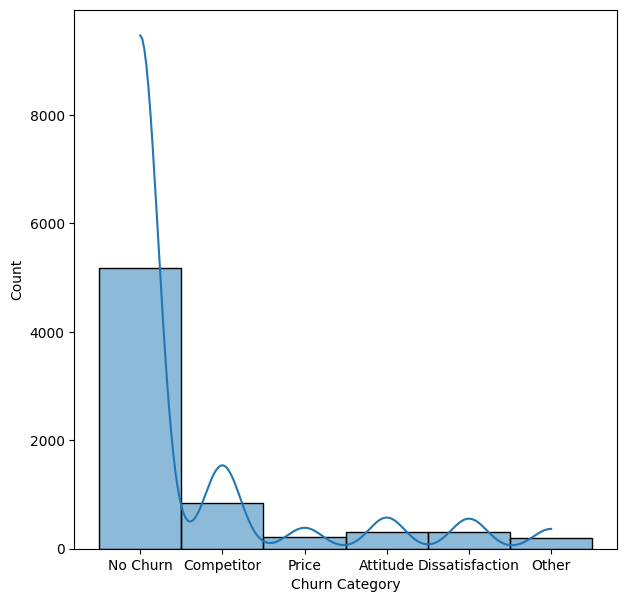

In [39]:
plt.figure(figsize=(7,7))
sns.histplot(data=status,x=status['Churn Category'],kde=True)
plt.show()

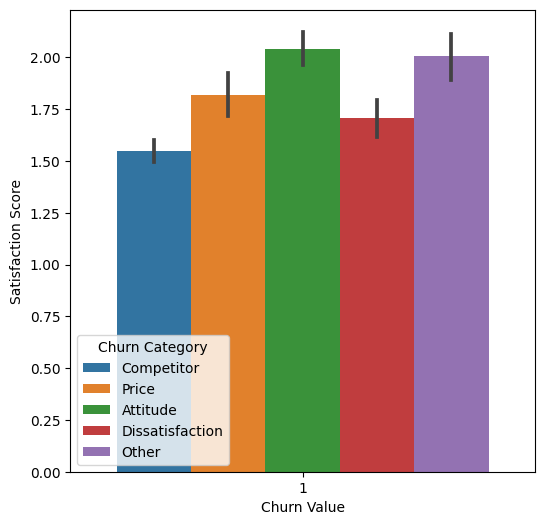

In [40]:
Churned_dataframe = status.loc[status['Churn Value']==1]
plt.figure(figsize=(6,6))
sns.barplot(data=Churned_dataframe,x=Churned_dataframe['Churn Value'],y=Churned_dataframe['Satisfaction Score'],hue="Churn Category")
plt.show()

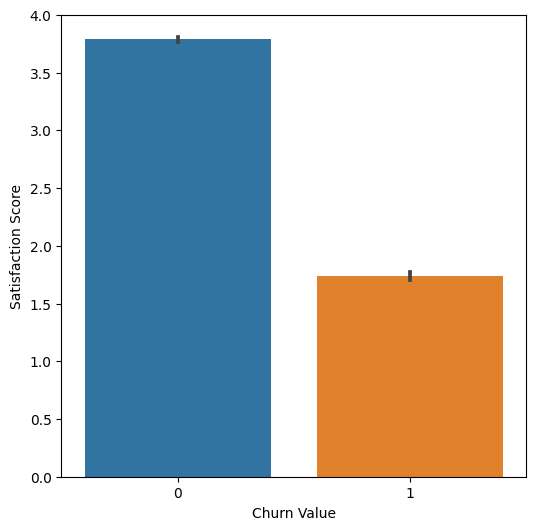

In [41]:
plt.figure(figsize=(6,6))
sns.barplot(data=status,x=status['Churn Value'],y=status['Satisfaction Score'])
plt.show()

Complete analysis can be found

**Dashboard name**- Analaysis on Status

#Calcluation of Market Share and Plotting using h2 library

In [42]:
groupeddataframe = location.groupby("Zip Code")["Customer ID"].count()
groupeddataframe

Zip Code
90001    4
90002    4
90003    5
90004    5
90005    4
        ..
96143    4
96145    3
96146    4
96148    4
96150    2
Name: Customer ID, Length: 1625, dtype: int64

In [43]:
merge_market_df = pd.merge(groupeddataframe,population, on="Zip Code")
merge_market_df

,Zip Code,Customer ID,Population
0,90001,4,54492.0
1,90002,4,44586.0
2,90003,5,58198.0
3,90004,5,67852.0
4,90005,4,43019.0
...,...,...,...
1620,96143,4,4806.0
1621,96145,3,4002.0
1622,96146,4,942.0
1623,96148,4,678.0


In [44]:
merge_market_df['market share'] = merge_market_df['Customer ID']/merge_market_df['Population']
merge_market_df

,Zip Code,Customer ID,Population,market share
0,90001,4,54492.0,0.000073
1,90002,4,44586.0,0.000090
2,90003,5,58198.0,0.000086
3,90004,5,67852.0,0.000074
4,90005,4,43019.0,0.000093
...,...,...,...,...
1620,96143,4,4806.0,0.000832
1621,96145,3,4002.0,0.000750
1622,96146,4,942.0,0.004246
1623,96148,4,678.0,0.005900


In [45]:
merge_market_df.rename(columns={"Customer ID":"Number of Customers"}, inplace=True)
merge_market_df

,Zip Code,Number of Customers,Population,market share
0,90001,4,54492.0,0.000073
1,90002,4,44586.0,0.000090
2,90003,5,58198.0,0.000086
3,90004,5,67852.0,0.000074
4,90005,4,43019.0,0.000093
...,...,...,...,...
1620,96143,4,4806.0,0.000832
1621,96145,3,4002.0,0.000750
1622,96146,4,942.0,0.004246
1623,96148,4,678.0,0.005900


In [46]:
marketshare_plot_df = pd.merge(merge_market_df,location,on="Zip Code")
marketshare_plot_df.groupby(["Latitude","Longitude"])

In [47]:
marketshare_plot_df.drop(['Customer ID'],axis=1,inplace=True)
marketshare_plot_df.drop_duplicates(inplace=True)
marketshare_plot_df

,Zip Code,Number of Customers,Population,market share,State,City,Latitude,Longitude
0,90001,4,54492.0,0.000073,California,Los Angeles,33.973616,-118.249020
4,90002,4,44586.0,0.000090,California,Los Angeles,33.949255,-118.246978
8,90003,5,58198.0,0.000086,California,Los Angeles,33.964131,-118.272783
13,90004,5,67852.0,0.000074,California,Los Angeles,34.076259,-118.310715
18,90005,4,43019.0,0.000093,California,Los Angeles,34.059281,-118.307420
...,...,...,...,...,...,...,...,...
7026,96143,4,4806.0,0.000832,California,Kings Beach,39.246654,-120.029273
7030,96145,3,4002.0,0.000750,California,Tahoe City,39.178337,-120.162806
7033,96146,4,942.0,0.004246,California,Olympic Valley,39.191797,-120.212401
7037,96148,4,678.0,0.005900,California,Tahoe Vista,39.241240,-120.054765


In [48]:
len(marketshare_plot_df['Zip Code'].unique())

1625

In [49]:
marketshare_plot_df['Zip Code'].value_counts()

95251    2
90001    1
95046    1
95070    1
95066    1
        ..
92648    1
92647    1
92646    1
92630    1
96150    1
Name: Zip Code, Length: 1625, dtype: int64

In [50]:
marketshare_plot_df.to_csv("try_spatial.csv")

In [51]:
marketshare_plot_df['market share'].max()

0.45454545454545453

#H3 plot

In [52]:
# Load your dataset into a DataFrame (assuming 'data' is your DataFrame)
# 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Customers', 'Market Share'

# Define the H3 resolution for your analysis
resolution = 9  # Adjust based on your needs

# Calculate H3 indexes for each data point
data=marketshare_plot_df
data['H3_Cell'] = data.apply(lambda row: h3.geo_to_h3(row['Latitude'], row['Longitude'], resolution), axis=1)

# Group data by H3 cell and calculate metrics
grouped = data.groupby('H3_Cell').agg(
    population=('Population', 'sum'),
    num_customers=('Number of Customers', 'sum'),
    mean_market_share=('market share', 'mean'),
    zip_code=('Zip Code', 'first'),# Store the first zip code (assuming it's the same for the H3 cell)
    city=('City', 'first')
).reset_index()

# Create a GeoDataFrame with H3 polygons and aggregated metrics
h3_cells = grouped['H3_Cell'].values
polygons = [Polygon(h3.h3_to_geo_boundary(cell, geo_json=True)) for cell in h3_cells]

gdf = gpd.GeoDataFrame(data=grouped, geometry=polygons)

# Create a Folium map centered on a location
center_lat, center_lon = data['Latitude'].mean(), data['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Convert GeoDataFrame to GeoJSON
gdf_json = gdf.to_json()

def style_function(feature):
    return {
        'fillColor': 'blue',  # Adjust polygon fill color
        'color': 'blue',      # Adjust polygon border color
        'weight': 2,          # Adjust polygon border weight
        'fillOpacity': 0.5    # Adjust polygon fill opacity
    }

# Add GeoJSON polygons to the map with tooltips
folium.GeoJson(
    gdf_json,
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(fields=['zip_code','city', 'mean_market_share'], aliases=['Zip Code','City', 'Market Share']),
).add_to(m)

# Display the map
m.save('h3_polygon_map_with_tooltip.html')  # Save the map to an HTML file


#Calculation of Churn rate and plotting using H2

In [53]:
merged_df = pd.merge(demographics,location,on="Customer ID")
merged_df = pd.merge(merged_df,population,on="Zip Code")
merged_df = pd.merge(merged_df,services,on="Customer ID")
merged_df = pd.merge(merged_df,status, on="Customer ID")
merged_df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,State,City,Zip Code,Latitude,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,1608-GMEWB,Male,76,No,No,0,California,Stockton,95215,37.946282,...,4200.25,0.0,0,704.25,4904.50,4,Stayed,0,No Churn,No Churn
1,7009-PCARS,Male,53,No,Yes,2,California,Stockton,95215,37.946282,...,1001.50,0.0,0,2160.95,3162.45,5,Stayed,0,No Churn,No Churn
2,8573-CGOCC,Male,48,No,No,0,California,Stockton,95215,37.946282,...,294.90,0.0,0,396.64,691.54,5,Stayed,0,No Churn,No Churn
3,0411-EZJZE,Female,62,No,No,0,California,Stockton,95215,37.946282,...,170.50,0.0,70,60.30,300.80,4,Joined,0,No Churn,No Churn
4,2817-LVCPP,Female,36,No,No,0,California,Sacramento,95822,38.512569,...,1023.95,0.0,0,631.00,1654.95,5,Stayed,0,No Churn,No Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5678-VFNEQ,Female,19,Yes,No,0,California,Rocklin,95677,38.790400,...,7412.25,0.0,0,311.69,7723.94,4,Stayed,0,No Churn,No Churn
7039,6777-TGHTM,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,5785.50,0.0,0,1579.40,7364.90,1,Churned,1,Competitor,Competitor had better devices
7040,4074-SJFFA,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,54.75,0.0,0,13.01,67.76,3,Churned,1,Dissatisfaction,Network reliability
7041,8942-DBMHZ,Male,26,No,No,0,California,San Francisco,94122,37.760412,...,255.35,0.0,0,493.32,748.67,5,Stayed,0,No Churn,No Churn


In [54]:
#Churn rate = Lost customers/Total Number of Customers (Per Zip Code)
churned_df = merged_df.loc[merged_df['Churn Value']==1]
churned_customers = churned_df.groupby(['Zip Code'])['Customer ID'].count()
churned_customers = churned_customers.reset_index()
churned_customers.rename(columns={"Customer ID":"Number of Lost Customers"},inplace=True)
churned_customers

,Zip Code,Number of Lost Customers
0,90001,1
1,90003,1
2,90004,2
3,90005,2
4,90006,1
...,...,...
1108,96141,1
1109,96142,1
1110,96143,1
1111,96148,2


In [55]:
Number_of_Customers = merged_df.groupby("Zip Code")["Customer ID"].count()
Number_of_Customers = Number_of_Customers.reset_index()
Number_of_Customers.rename(columns={"Customer ID":"Number of Customers"},inplace=True)
display(Number_of_Customers)

,Zip Code,Number of Customers
0,90001,4
1,90002,4
2,90003,5
3,90004,5
4,90005,4
...,...,...
1620,96143,4
1621,96145,3
1622,96146,4
1623,96148,4


In [56]:
merged_churned_rate = pd.merge(Number_of_Customers,churned_customers,how="left",on="Zip Code")
merged_churned_rate

,Zip Code,Number of Customers,Number of Lost Customers
0,90001,4,1.0
1,90002,4,NaN
2,90003,5,1.0
3,90004,5,2.0
4,90005,4,2.0
...,...,...,...
1620,96143,4,1.0
1621,96145,3,NaN
1622,96146,4,NaN
1623,96148,4,2.0


In [57]:
merged_churned_rate.isnull().sum()

Zip Code                      0
Number of Customers           0
Number of Lost Customers    512
dtype: int64

In [58]:
merged_churned_rate.fillna(0,inplace=True)
merged_churned_rate

,Zip Code,Number of Customers,Number of Lost Customers
0,90001,4,1.0
1,90002,4,0.0
2,90003,5,1.0
3,90004,5,2.0
4,90005,4,2.0
...,...,...,...
1620,96143,4,1.0
1621,96145,3,0.0
1622,96146,4,0.0
1623,96148,4,2.0


In [59]:
merged_churned_rate['Churn rate']=merged_churned_rate['Number of Lost Customers']/merged_churned_rate['Number of Customers']
merged_churned_rate

,Zip Code,Number of Customers,Number of Lost Customers,Churn rate
0,90001,4,1.0,0.25
1,90002,4,0.0,0.00
2,90003,5,1.0,0.20
3,90004,5,2.0,0.40
4,90005,4,2.0,0.50
...,...,...,...,...
1620,96143,4,1.0,0.25
1621,96145,3,0.0,0.00
1622,96146,4,0.0,0.00
1623,96148,4,2.0,0.50


In [60]:
Churned_rate_plot = pd.merge(merged_churned_rate,location,on="Zip Code")
Churned_rate_plot

,Zip Code,Number of Customers,Number of Lost Customers,Churn rate,Customer ID,State,City,Latitude,Longitude
0,90001,4,1.0,0.25,3217-FZDMN,California,Los Angeles,33.973616,-118.249020
1,90001,4,1.0,0.25,7590-VHVEG,California,Los Angeles,33.973616,-118.249020
2,90001,4,1.0,0.25,3307-TLCUD,California,Los Angeles,33.973616,-118.249020
3,90001,4,1.0,0.25,0136-IFMYD,California,Los Angeles,33.973616,-118.249020
4,90002,4,0.0,0.00,5575-GNVDE,California,Los Angeles,33.949255,-118.246978
...,...,...,...,...,...,...,...,...,...
7038,96148,4,2.0,0.50,2636-ALXXZ,California,Tahoe Vista,39.241240,-120.054765
7039,96148,4,2.0,0.50,1627-AFWVJ,California,Tahoe Vista,39.241240,-120.054765
7040,96148,4,2.0,0.50,2851-MMUTZ,California,Tahoe Vista,39.241240,-120.054765
7041,96150,2,2.0,1.00,9725-SCPZG,California,South Lake Tahoe,38.911577,-120.106169


In [61]:
Churned_rate_plot.drop('Customer ID',axis=1,inplace=True)
Churned_rate_plot.drop_duplicates(inplace=True)
Churned_rate_plot

,Zip Code,Number of Customers,Number of Lost Customers,Churn rate,State,City,Latitude,Longitude
0,90001,4,1.0,0.25,California,Los Angeles,33.973616,-118.249020
4,90002,4,0.0,0.00,California,Los Angeles,33.949255,-118.246978
8,90003,5,1.0,0.20,California,Los Angeles,33.964131,-118.272783
13,90004,5,2.0,0.40,California,Los Angeles,34.076259,-118.310715
18,90005,4,2.0,0.50,California,Los Angeles,34.059281,-118.307420
...,...,...,...,...,...,...,...,...
7026,96143,4,1.0,0.25,California,Kings Beach,39.246654,-120.029273
7030,96145,3,0.0,0.00,California,Tahoe City,39.178337,-120.162806
7033,96146,4,0.0,0.00,California,Olympic Valley,39.191797,-120.212401
7037,96148,4,2.0,0.50,California,Tahoe Vista,39.241240,-120.054765


In [62]:
Churned_rate_plot.to_csv("churn_spatial_plot.csv")

# H3 plot

In [63]:
# Load your dataset into a DataFrame (assuming 'data' is your DataFrame)
# 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Customers', 'Market Share'

# Define the H3 resolution for your analysis
resolution = 9  # Adjust based on your needs

# Calculate H3 indexes for each data point
data=Churned_rate_plot
data['H3_Cell'] = data.apply(lambda row: h3.geo_to_h3(row['Latitude'], row['Longitude'], resolution), axis=1)

# Group data by H3 cell and calculate metrics
grouped = data.groupby('H3_Cell').agg(
    num_lost_customers=('Number of Lost Customers','sum'),
    num_customers=('Number of Customers', 'sum'),
    mean_churn_rate=('Churn rate', 'mean'),
    zip_code=('Zip Code', 'first'),# Store the first zip code (assuming it's the same for the H3 cell)
    city=('City', 'first')
).reset_index()

# Create a GeoDataFrame with H3 polygons and aggregated metrics
h3_cells = grouped['H3_Cell'].values
polygons = [Polygon(h3.h3_to_geo_boundary(cell, geo_json=True)) for cell in h3_cells]

gdf = gpd.GeoDataFrame(data=grouped, geometry=polygons)

# Create a Folium map centered on a location
center_lat, center_lon = data['Latitude'].mean(), data['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Convert GeoDataFrame to GeoJSON
gdf_json = gdf.to_json()

def style_function(feature):
    return {
        'fillColor': 'blue',  # Adjust polygon fill color
        'color': 'blue',      # Adjust polygon border color
        'weight': 2,          # Adjust polygon border weight
        'fillOpacity': 0.5    # Adjust polygon fill opacity
    }

# Add GeoJSON polygons to the map with tooltips
folium.GeoJson(
    gdf_json,
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(fields=['zip_code','city', 'mean_churn_rate'], aliases=['Zip Code','City', 'Churn Rate']),
).add_to(m)

# Display the map
m.save('h3_polygon_map_with_churn_tooltip.html')  # Save the map to an HTML file


## Data Analysis on Merged data

In [64]:
merged_df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,State,City,Zip Code,Latitude,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,1608-GMEWB,Male,76,No,No,0,California,Stockton,95215,37.946282,...,4200.25,0.0,0,704.25,4904.50,4,Stayed,0,No Churn,No Churn
1,7009-PCARS,Male,53,No,Yes,2,California,Stockton,95215,37.946282,...,1001.50,0.0,0,2160.95,3162.45,5,Stayed,0,No Churn,No Churn
2,8573-CGOCC,Male,48,No,No,0,California,Stockton,95215,37.946282,...,294.90,0.0,0,396.64,691.54,5,Stayed,0,No Churn,No Churn
3,0411-EZJZE,Female,62,No,No,0,California,Stockton,95215,37.946282,...,170.50,0.0,70,60.30,300.80,4,Joined,0,No Churn,No Churn
4,2817-LVCPP,Female,36,No,No,0,California,Sacramento,95822,38.512569,...,1023.95,0.0,0,631.00,1654.95,5,Stayed,0,No Churn,No Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5678-VFNEQ,Female,19,Yes,No,0,California,Rocklin,95677,38.790400,...,7412.25,0.0,0,311.69,7723.94,4,Stayed,0,No Churn,No Churn
7039,6777-TGHTM,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,5785.50,0.0,0,1579.40,7364.90,1,Churned,1,Competitor,Competitor had better devices
7040,4074-SJFFA,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,54.75,0.0,0,13.01,67.76,3,Churned,1,Dissatisfaction,Network reliability
7041,8942-DBMHZ,Male,26,No,No,0,California,San Francisco,94122,37.760412,...,255.35,0.0,0,493.32,748.67,5,Stayed,0,No Churn,No Churn


### Plot distribution of Individual Features by Churn

In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   State                              7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Zip Code                           7043 non-null   int64  
 9   Latitude                           7043 non-null   float64
 10  Longitude                          7043 non-null   float64
 11  Population                         7043 non-null   float

In [66]:
merged_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'State', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Home Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [67]:
data_univariate_analysis = merged_df[['Gender','Married','Dependents','Referred a Friend','Offer','Home Phone Service',
                                      'Multiple Lines','Internet Service','Internet Type','Online Security', 'Online Backup', 'Device Protection Plan','Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
                                      'Payment Method','Customer Status','Churn Value','Tenure in Months'
                                      ]]

In [68]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data_univariate_analysis['tenure_group'] = pd.cut(data_univariate_analysis['Tenure in Months'], range(1, 80, 12), right=False, labels=labels)

data_univariate_analysis

,Gender,Married,Dependents,Referred a Friend,Offer,Home Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Value,Tenure in Months,tenure_group
0,Male,No,No,No,Offer B,Yes,Yes,Yes,Fiber Optic,No,...,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,Stayed,0,45,37 - 48
1,Male,No,Yes,No,Offer B,Yes,No,No,None,No,...,No,No,No,One Year,No,Bank Withdrawal,Stayed,0,55,49 - 60
2,Male,No,No,No,None,Yes,No,No,None,No,...,No,No,No,Month-to-Month,No,Credit Card,Stayed,0,16,13 - 24
3,Female,No,No,No,None,Yes,Yes,Yes,DSL,No,...,No,No,No,Month-to-Month,Yes,Bank Withdrawal,Joined,0,3,1 - 12
4,Female,No,No,No,None,Yes,No,No,None,No,...,No,No,No,Two Year,No,Credit Card,Stayed,0,50,49 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,Yes,No,Yes,Offer A,Yes,Yes,Yes,Fiber Optic,Yes,...,Yes,Yes,Yes,One Year,Yes,Credit Card,Stayed,0,71,61 - 72
7039,Female,No,No,No,None,Yes,Yes,Yes,Fiber Optic,Yes,...,Yes,Yes,Yes,One Year,Yes,Credit Card,Churned,1,53,49 - 60
7040,Female,No,No,No,None,Yes,No,Yes,DSL,No,...,Yes,Yes,Yes,Month-to-Month,Yes,Mailed Check,Churned,1,1,1 - 12
7041,Male,No,No,No,None,Yes,No,No,None,No,...,No,No,No,Month-to-Month,No,Mailed Check,Stayed,0,12,1 - 12


In [69]:
data_univariate_analysis.drop(['Tenure in Months'],axis=1,inplace=True)

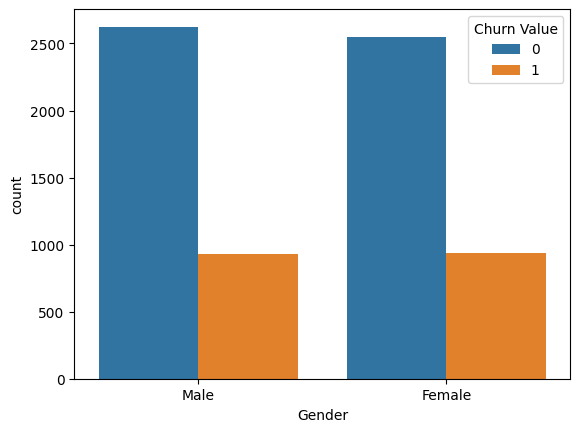

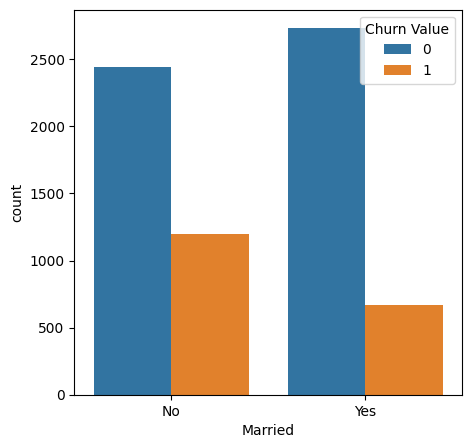

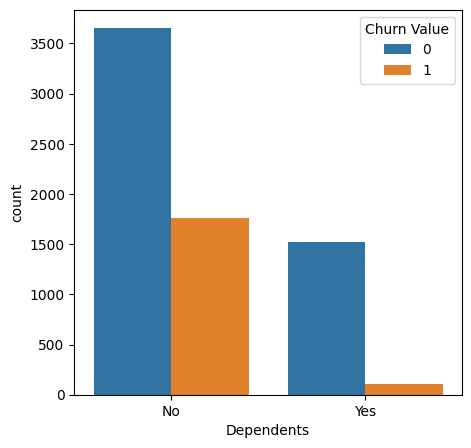

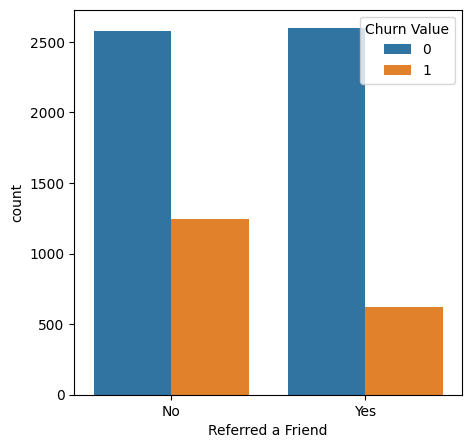

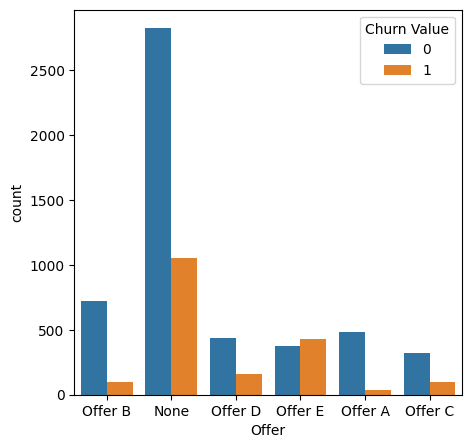

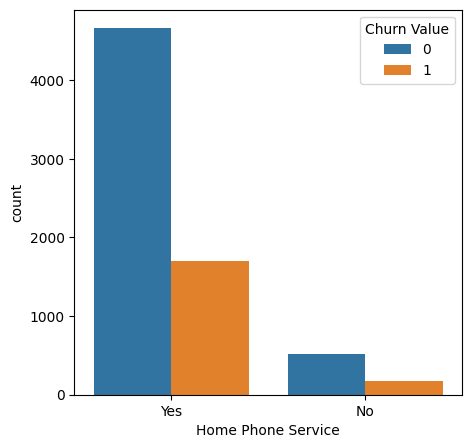

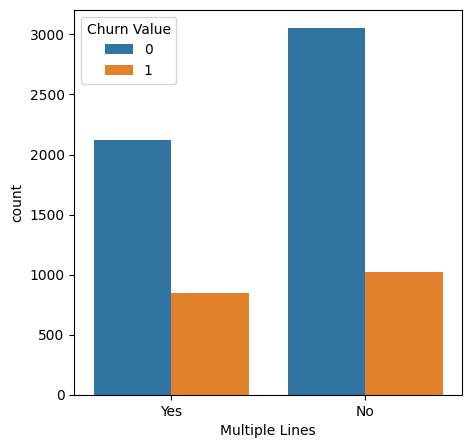

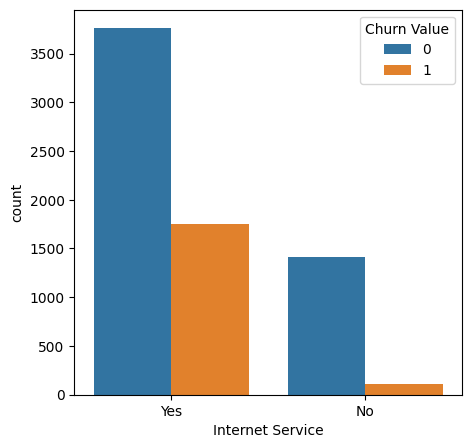

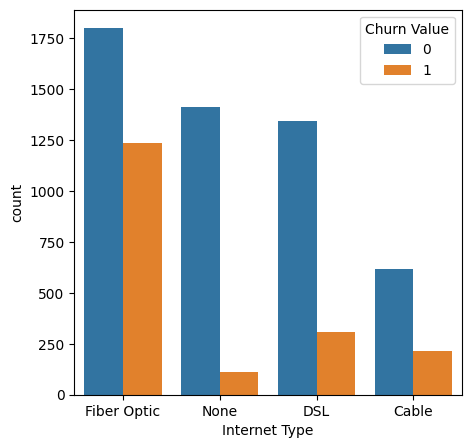

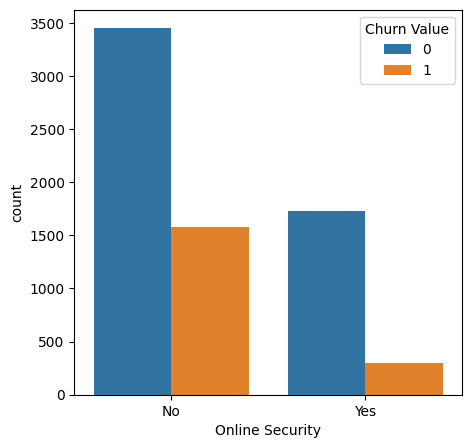

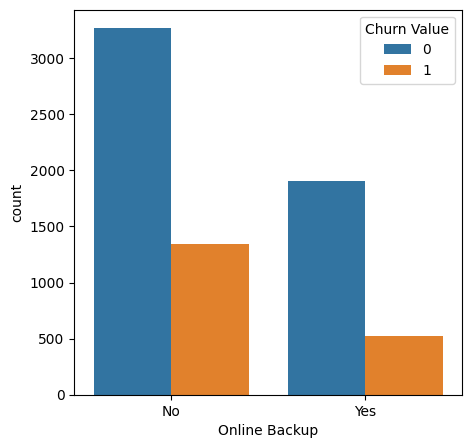

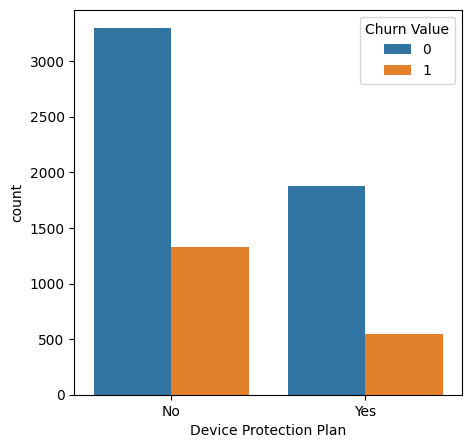

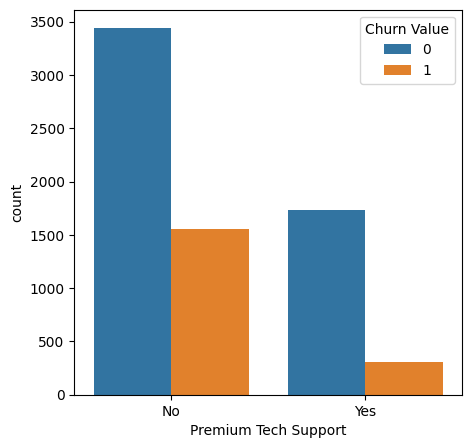

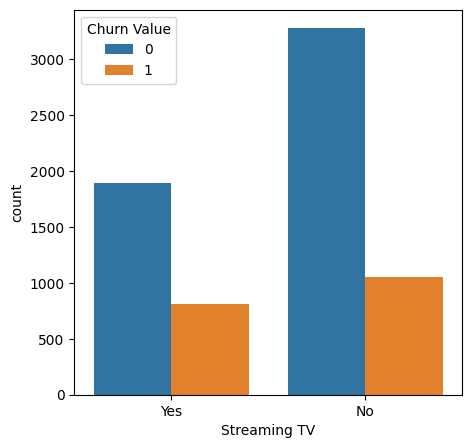

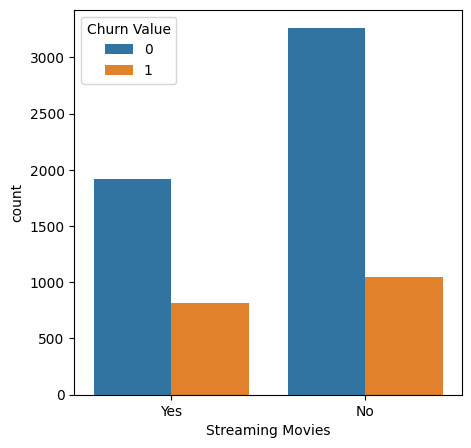

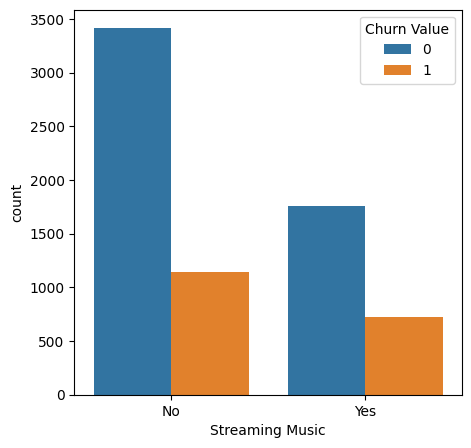

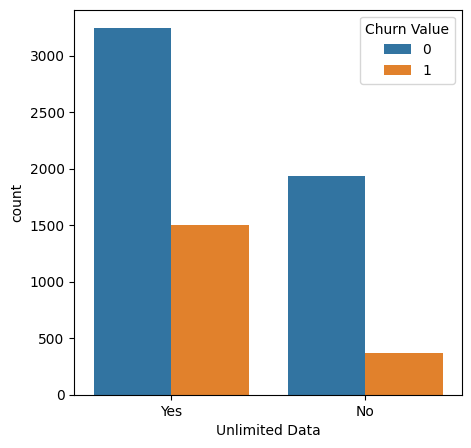

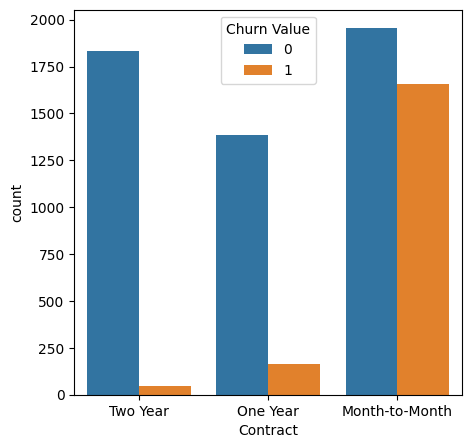

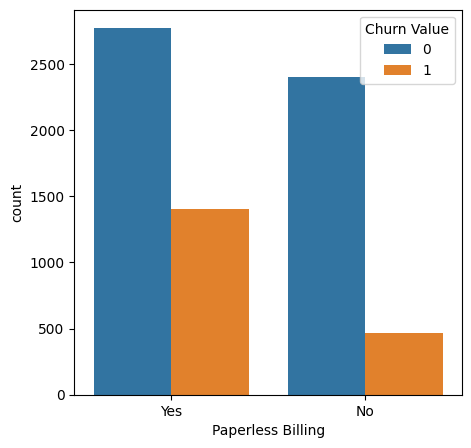

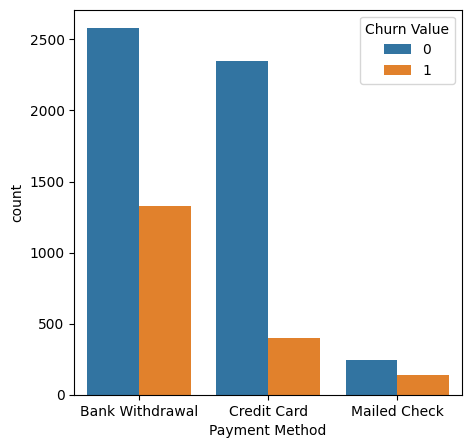

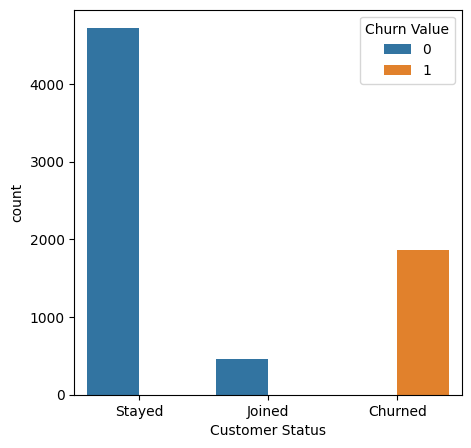

<Figure size 500x500 with 0 Axes>

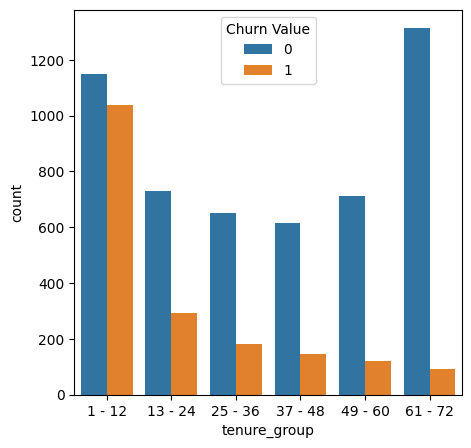

In [70]:
for i, predictor in enumerate(data_univariate_analysis.drop(columns=['Churn Value'])):
    plt.figure(figsize=(5,5))
    plt.figure(i)
    sns.countplot(data=data_univariate_analysis, x=predictor, hue='Churn Value')

###### Churn by Monthly Charges

Text(0.5, 1.0, 'Monthly charges by churn')

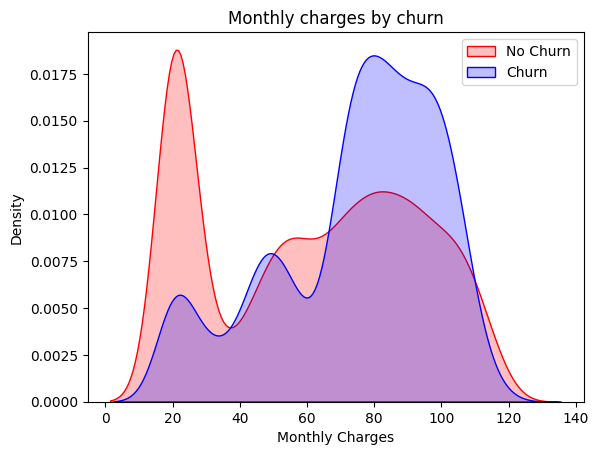

In [71]:
Month = sns.kdeplot(merged_df['Monthly Charge'][(merged_df["Churn Value"] == 0) ],
                color="Red", shade = True)
Month = sns.kdeplot(merged_df['Monthly Charge'][(merged_df["Churn Value"] == 1) ],
                ax =Month, color="Blue", shade= True)
Month.legend(["No Churn","Churn"],loc='upper right')
Month.set_ylabel('Density')
Month.set_xlabel('Monthly Charges')
Month.set_title('Monthly charges by churn')

**Insight**: Number of customers churning are higher when Monthly Charges ar higher

Text(0.5, 1.0, 'Total charges by churn')

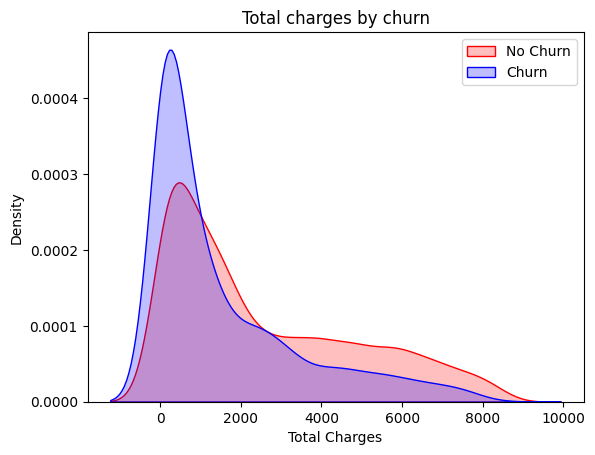

In [72]:
Total = sns.kdeplot(merged_df['Total Charges'][(merged_df["Churn Value"] == 0) ],
                color="Red", shade = True)
Total = sns.kdeplot(merged_df['Total Charges'][(merged_df["Churn Value"] == 1) ],
                ax =Total, color="Blue", shade= True)
Total.legend(["No Churn","Churn"],loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges by churn')

**Insight**: Number of customers churning are higher when Total Charges are lower

Text(0.5, 1.0, 'Total Revenue by churn')

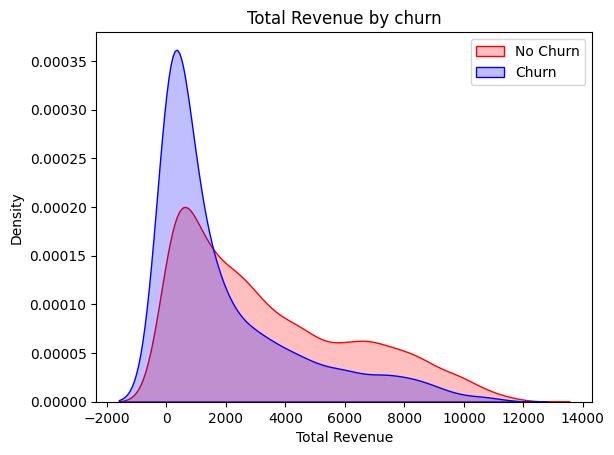

In [73]:
Total_revenue = sns.kdeplot(merged_df['Total Revenue'][(merged_df["Churn Value"] == 0) ],
                color="Red", shade = True)
Total_revenue = sns.kdeplot(merged_df['Total Revenue'][(merged_df["Churn Value"] == 1) ],
                ax =Total_revenue, color="Blue", shade= True)
Total_revenue.legend(["No Churn","Churn"],loc='upper right')
Total_revenue.set_ylabel('Density')
Total_revenue.set_xlabel('Total Revenue')
Total_revenue.set_title('Total Revenue by churn')

**Insight**: Number of customers churning are higher when Total Revune is low

Text(0.5, 1.0, 'Total Long Distance by churn')

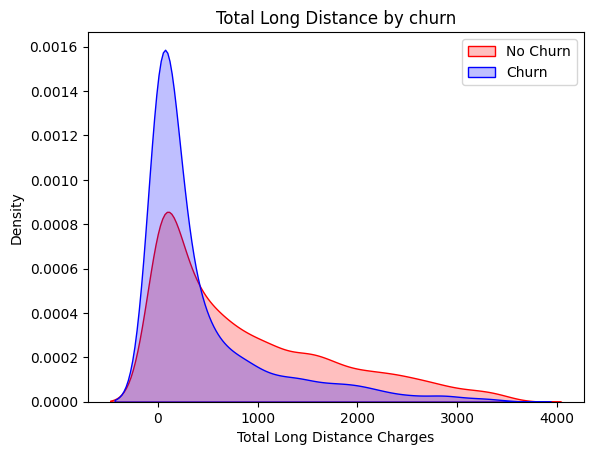

In [74]:
Total_long = sns.kdeplot(merged_df['Total Long Distance Charges'][(merged_df["Churn Value"] == 0) ],
                color="Red", shade = True)
Total_long = sns.kdeplot(merged_df['Total Long Distance Charges'][(merged_df["Churn Value"] == 1) ],
                ax =Total_long, color="Blue", shade= True)
Total_long.legend(["No Churn","Churn"],loc='upper right')
Total_long.set_ylabel('Density')
Total_long.set_xlabel('Total Long Distance Charges')
Total_long.set_title('Total Long Distance by churn')

**Insight**: Number of customers churning are higher when Total Long Distance Charges are lower

Text(0.5, 1.0, 'Total Extra Data charges by churn')

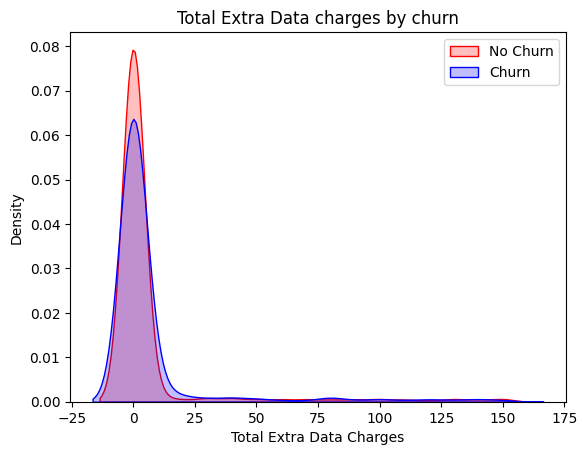

In [75]:
Total_extra = sns.kdeplot(merged_df['Total Extra Data Charges'][(merged_df["Churn Value"] == 0) ],
                color="Red", shade = True)
Total_extra = sns.kdeplot(merged_df['Total Extra Data Charges'][(merged_df["Churn Value"] == 1) ],
                ax =Total_extra, color="Blue", shade= True)
Total_extra.legend(["No Churn","Churn"],loc='upper right')
Total_extra.set_ylabel('Density')
Total_extra.set_xlabel('Total Extra Data Charges')
Total_extra.set_title('Total Extra Data charges by churn')

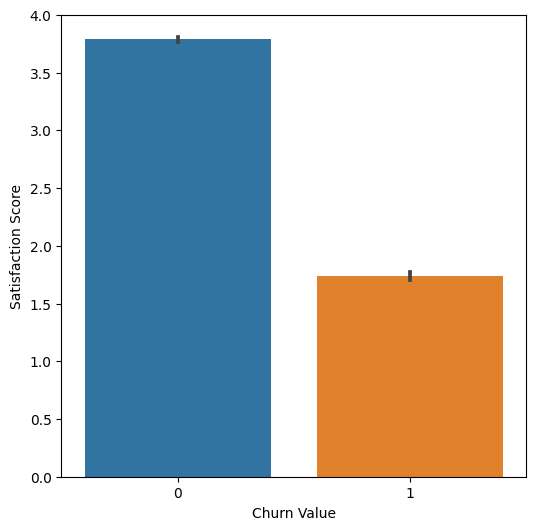

In [76]:
plt.figure(figsize=(6,6))
sns.barplot(data=status,x=merged_df['Churn Value'],y=merged_df['Satisfaction Score'])
plt.show()

**Insight:** Customers are Churning when the satisfaction score is between **(0-~1.8)**

Combining the observations from the four factors – Tenure, Total Revenue, Total Long Distance Charges, Monthly Charges, and Total Charges – provides a clearer understanding. When a customer has a higher monthly charge and a shorter tenure, it leads to reduced total charges and total revenue. Consequently, these interconnected factors, including elevated monthly charges, shorter tenure, diminished total charges, and lower revenue, are associated with a higher likelihood of churn.

In [77]:
merged_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'State', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Home Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [78]:
merged_df_copy = merged_df.drop(['Zip Code','Latitude','Longitude','State','Customer ID','Number of Dependents','City',
                                 'Churn Reason','Number of Referrals'],axis=1)

In [79]:
merged_df_copy.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Population',
       'Referred a Friend', 'Tenure in Months', 'Offer', 'Home Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category'],
      dtype='object')

In [80]:
merged_numerical_values = pd.get_dummies(merged_df_copy)
merged_numerical_values.head()

,Age,Population,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Payment Method_Mailed Check,Customer Status_Churned,Customer Status_Joined,Customer Status_Stayed,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_No Churn,Churn Category_Other,Churn Category_Price
0,76,23789.0,45,15.65,18,93.90,4200.25,0.0,0,704.25,...,0,0,0,1,0,0,0,1,0,0
1,53,23789.0,55,39.29,0,19.10,1001.50,0.0,0,2160.95,...,0,0,0,1,0,0,0,1,0,0
2,48,23789.0,16,24.79,0,19.75,294.90,0.0,0,396.64,...,0,0,0,1,0,0,0,1,0,0
3,62,23789.0,3,20.10,29,60.25,170.50,0.0,70,60.30,...,0,0,1,0,0,0,0,1,0,0
4,36,44683.0,50,12.62,0,19.40,1023.95,0.0,0,631.00,...,0,0,0,1,0,0,0,1,0,0


<Axes: >

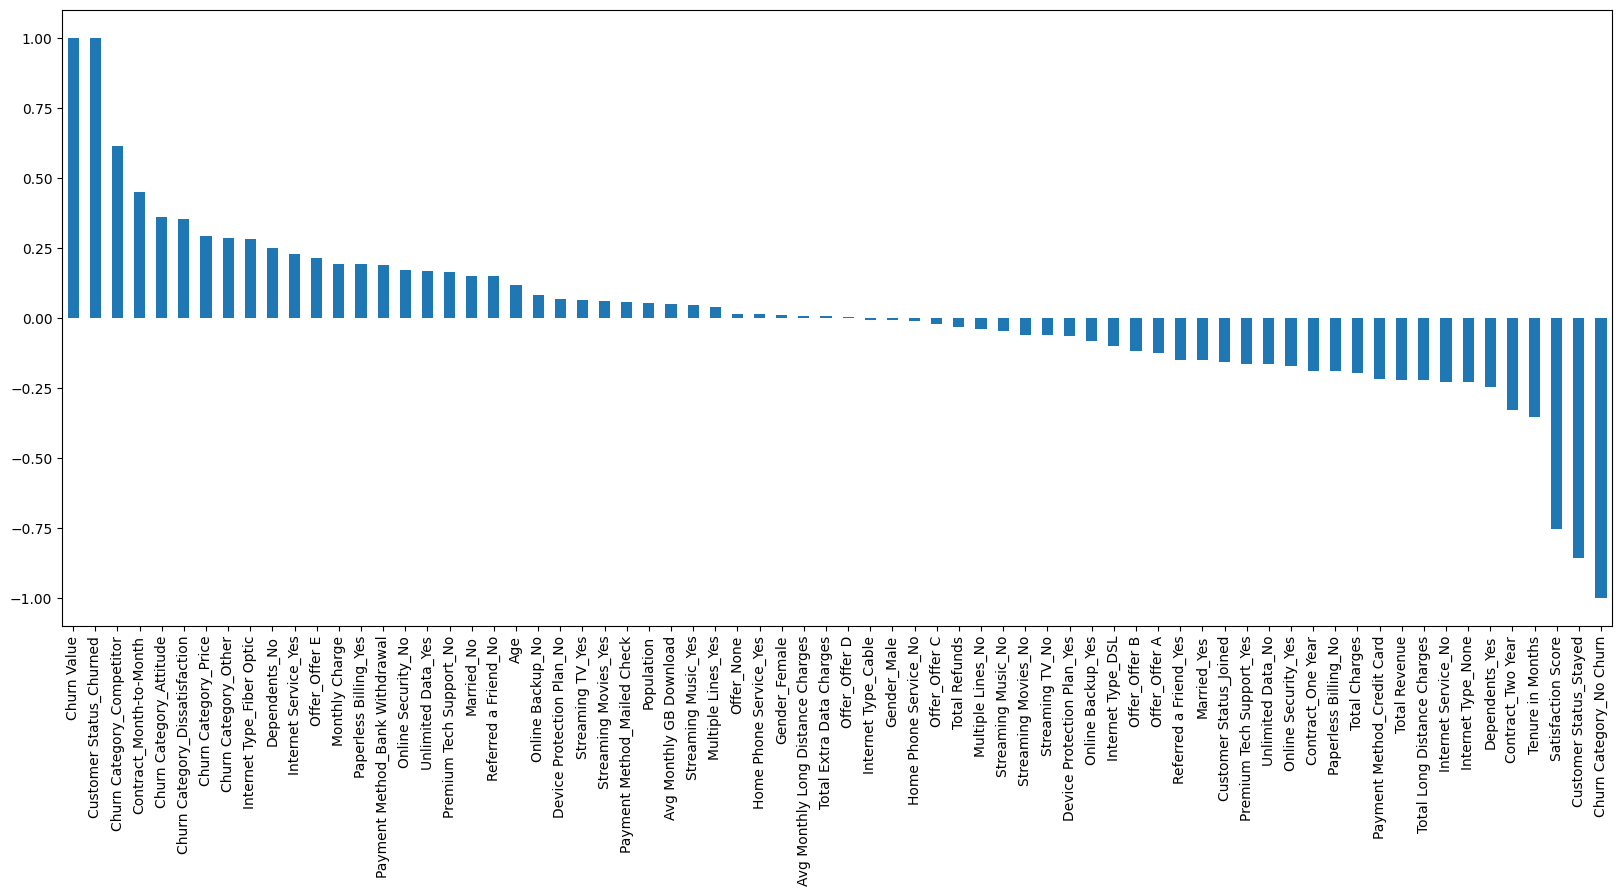

In [81]:
plt.figure(figsize=(20,8))
merged_numerical_values.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

**Insight** from the above Correlation graph:

Highest Churn is found because of the following reasons in the below order:
1.   Competitor
2.   Attitude
3.   Dissatisfaction
4.   Price





<Axes: >

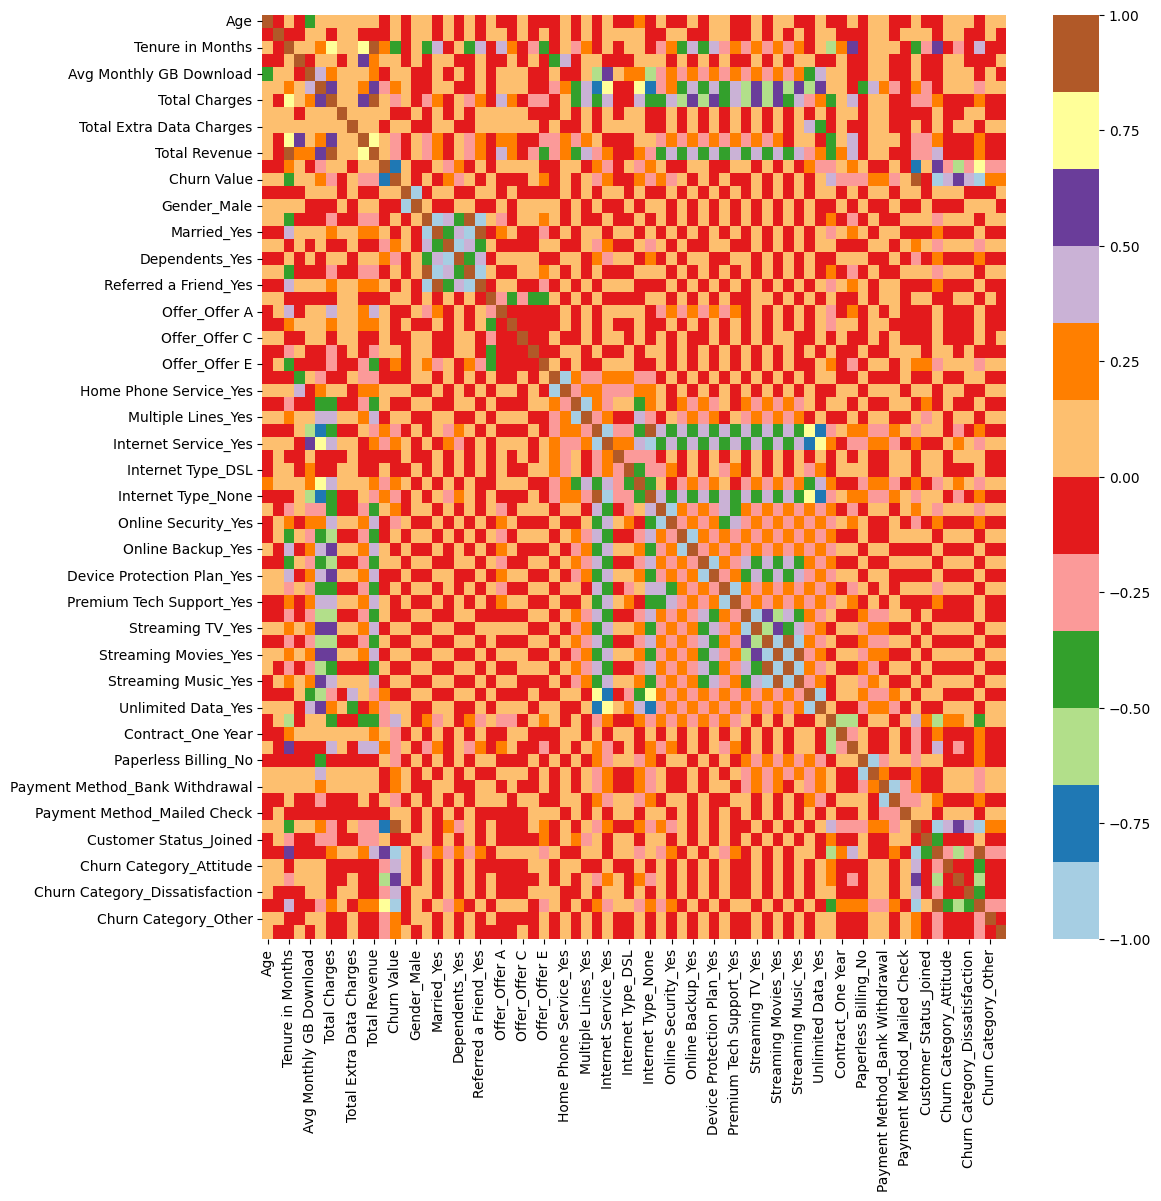

In [82]:
plt.figure(figsize=(12,12))
sns.heatmap(merged_numerical_values.corr(), cmap="Paired")

In [83]:
merged_df_copy.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Population',
       'Referred a Friend', 'Tenure in Months', 'Offer', 'Home Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category'],
      dtype='object')

In [84]:
merged_df_copy_other_factors = merged_df_copy.drop(['Churn Category','Customer Status'],axis=1)
merged_df_copy_other_factors

,Gender,Age,Married,Dependents,Population,Referred a Friend,Tenure in Months,Offer,Home Phone Service,Avg Monthly Long Distance Charges,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value
0,Male,76,No,No,23789.0,No,45,Offer B,Yes,15.65,...,Yes,Bank Withdrawal,93.90,4200.25,0.0,0,704.25,4904.50,4,0
1,Male,53,No,Yes,23789.0,No,55,Offer B,Yes,39.29,...,No,Bank Withdrawal,19.10,1001.50,0.0,0,2160.95,3162.45,5,0
2,Male,48,No,No,23789.0,No,16,None,Yes,24.79,...,No,Credit Card,19.75,294.90,0.0,0,396.64,691.54,5,0
3,Female,62,No,No,23789.0,No,3,None,Yes,20.10,...,Yes,Bank Withdrawal,60.25,170.50,0.0,70,60.30,300.80,4,0
4,Female,36,No,No,44683.0,No,50,None,Yes,12.62,...,No,Credit Card,19.40,1023.95,0.0,0,631.00,1654.95,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,19,Yes,No,21510.0,Yes,71,Offer A,Yes,4.39,...,Yes,Credit Card,104.10,7412.25,0.0,0,311.69,7723.94,4,0
7039,Female,44,No,No,55504.0,No,53,None,Yes,29.80,...,Yes,Credit Card,106.95,5785.50,0.0,0,1579.40,7364.90,1,1
7040,Female,44,No,No,55504.0,No,1,None,Yes,13.01,...,Yes,Mailed Check,54.75,54.75,0.0,0,13.01,67.76,3,1
7041,Male,26,No,No,55504.0,No,12,None,Yes,41.11,...,No,Mailed Check,20.45,255.35,0.0,0,493.32,748.67,5,0


In [85]:
merged_numerical_values_other = pd.get_dummies(merged_df_copy_other_factors)
merged_numerical_values_other.head()

,Age,Population,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,76,23789.0,45,15.65,18,93.90,4200.25,0.0,0,704.25,...,0,1,0,0,1,0,1,1,0,0
1,53,23789.0,55,39.29,0,19.10,1001.50,0.0,0,2160.95,...,1,0,0,1,0,1,0,1,0,0
2,48,23789.0,16,24.79,0,19.75,294.90,0.0,0,396.64,...,1,0,1,0,0,1,0,0,1,0
3,62,23789.0,3,20.10,29,60.25,170.50,0.0,70,60.30,...,1,0,1,0,0,0,1,1,0,0
4,36,44683.0,50,12.62,0,19.40,1023.95,0.0,0,631.00,...,1,0,0,0,1,1,0,0,1,0


<Axes: >

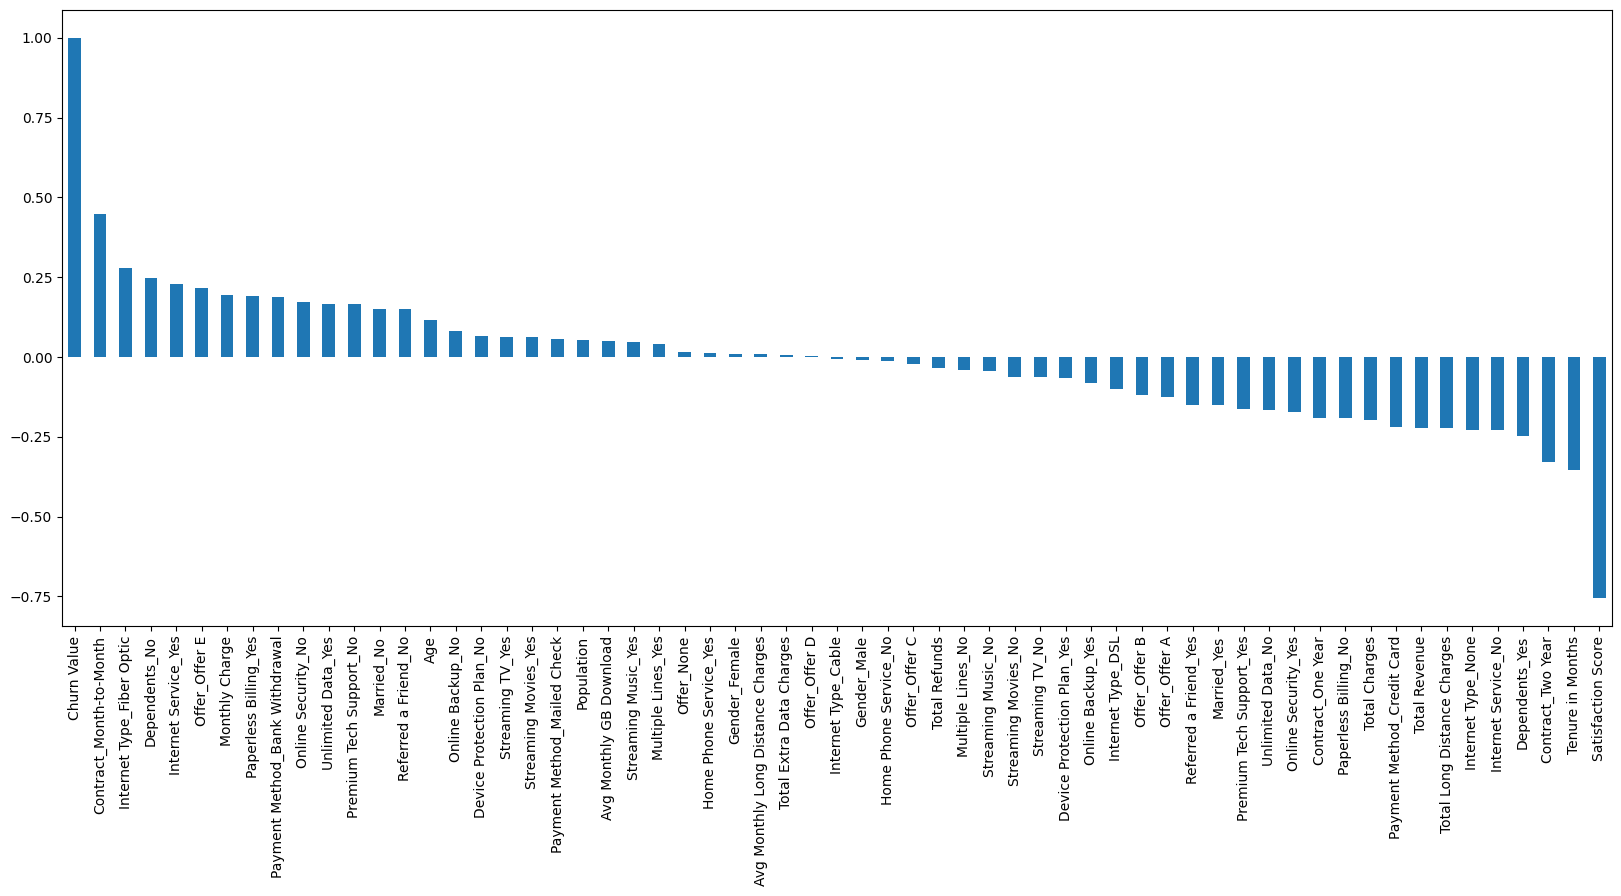

In [86]:
plt.figure(figsize=(20,8))
merged_numerical_values_other.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

Insight from the above Correlation graph:

**Highest Churn** is found when the **Contract type is Month-Month**, **Internet Type is Fibre Optic**, **No Dependents**, **No Online Security** and **No Premimum Tech Support**


**Low Churn** is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 2+ years

**Factors** like Gender, Availability of Home PhoneService, Monthly Long Distance Charges and Multiple lines have alomost NO impact on Churn




<Axes: >

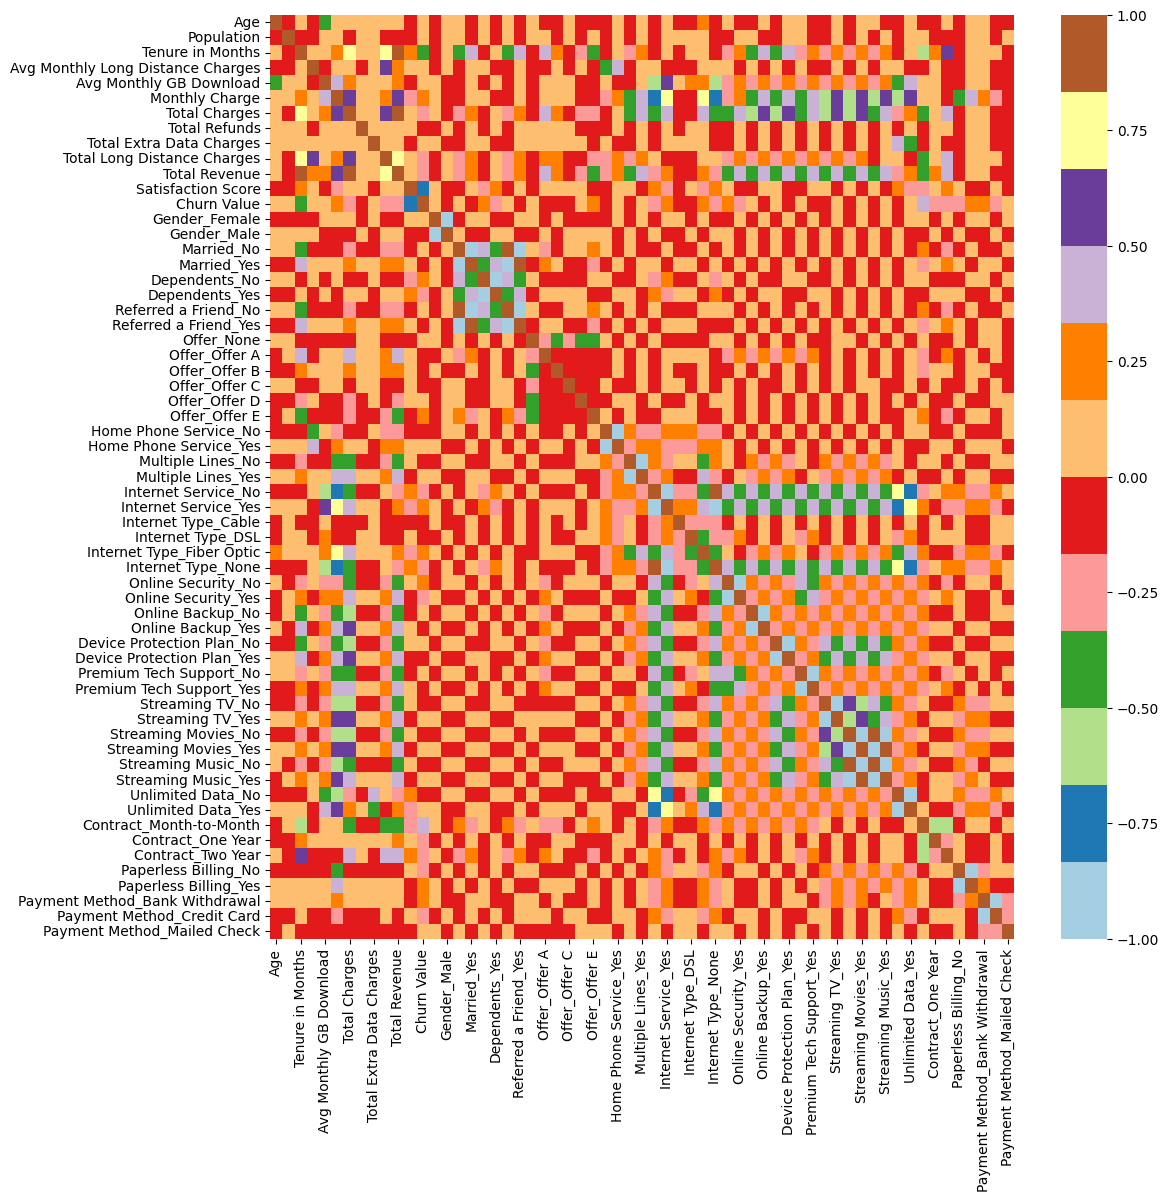

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(merged_numerical_values_other.corr(), cmap="Paired")

#### **CONCLUSION** ####

Highest Churn is found in the below cases:


1.  High Monthly Charges
2.  Shorter Tenure (1-12)
3.  Contract Type - Month-Month
4.  Internet Type - Fibre Optic
5.  No Dependents
6.  No Online Security
7.  No Premimium Tech Support
8.  Low Satisfaction Score - (0-2)



# Prediction of Customer Churn

In [88]:
merged_df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,State,City,Zip Code,Latitude,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,1608-GMEWB,Male,76,No,No,0,California,Stockton,95215,37.946282,...,4200.25,0.0,0,704.25,4904.50,4,Stayed,0,No Churn,No Churn
1,7009-PCARS,Male,53,No,Yes,2,California,Stockton,95215,37.946282,...,1001.50,0.0,0,2160.95,3162.45,5,Stayed,0,No Churn,No Churn
2,8573-CGOCC,Male,48,No,No,0,California,Stockton,95215,37.946282,...,294.90,0.0,0,396.64,691.54,5,Stayed,0,No Churn,No Churn
3,0411-EZJZE,Female,62,No,No,0,California,Stockton,95215,37.946282,...,170.50,0.0,70,60.30,300.80,4,Joined,0,No Churn,No Churn
4,2817-LVCPP,Female,36,No,No,0,California,Sacramento,95822,38.512569,...,1023.95,0.0,0,631.00,1654.95,5,Stayed,0,No Churn,No Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5678-VFNEQ,Female,19,Yes,No,0,California,Rocklin,95677,38.790400,...,7412.25,0.0,0,311.69,7723.94,4,Stayed,0,No Churn,No Churn
7039,6777-TGHTM,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,5785.50,0.0,0,1579.40,7364.90,1,Churned,1,Competitor,Competitor had better devices
7040,4074-SJFFA,Female,44,No,No,0,California,San Francisco,94122,37.760412,...,54.75,0.0,0,13.01,67.76,3,Churned,1,Dissatisfaction,Network reliability
7041,8942-DBMHZ,Male,26,No,No,0,California,San Francisco,94122,37.760412,...,255.35,0.0,0,493.32,748.67,5,Stayed,0,No Churn,No Churn


In [89]:
data = merged_df

In [90]:
# Assuming 'data' is your DataFrame containing the dataset
# Drop columns that are unlikely to contribute to churn prediction
data = data.drop(['Customer ID', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude','Dependents','Referred a Friend','Churn Reason','Offer','Customer Status'], axis=1)

# Handle missing values and encode categorical variables
data = data.dropna()  # Remove rows with missing values for simplicity
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Married'] = encoder.fit_transform(data['Married'])
data['Multiple Lines'] = encoder.fit_transform(data['Multiple Lines'])
data['Home Phone Service'] = encoder.fit_transform(data['Home Phone Service'])
data['Internet Service'] = encoder.fit_transform(data['Internet Service'])
data['Internet Type'] = encoder.fit_transform(data['Internet Type'])
data['Online Security'] = encoder.fit_transform(data['Online Security'])
data['Online Backup'] = encoder.fit_transform(data['Online Backup'])
data['Device Protection Plan'] = encoder.fit_transform(data['Device Protection Plan'])
data['Premium Tech Support'] = encoder.fit_transform(data['Premium Tech Support'])
data['Streaming TV'] = encoder.fit_transform(data['Streaming TV'])
data['Streaming Movies'] = encoder.fit_transform(data['Streaming Movies'])
data['Streaming Music'] = encoder.fit_transform(data['Streaming Music'])
data['Unlimited Data'] = encoder.fit_transform(data['Unlimited Data'])
data['Contract'] = encoder.fit_transform(data['Contract'])
data['Paperless Billing'] = encoder.fit_transform(data['Paperless Billing'])
data['Payment Method'] = encoder.fit_transform(data['Payment Method'])
data['Churn Category'] = encoder.fit_transform(data['Churn Category'])


# ... encode other categorical variables similarly

# Define features and target
X = data.drop(['Churn Value', 'Churn Category'], axis=1)
y = data['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9602555003548616
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1051
           1       0.97      0.87      0.92       358

    accuracy                           0.96      1409
   macro avg       0.97      0.93      0.95      1409
weighted avg       0.96      0.96      0.96      1409



In [91]:
data['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

### Balancing the data set and Applying Random Forest

In [92]:
## Balancing the dataset and applying ML model Random Regression

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9786641929499073
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       424
           1       0.99      0.98      0.98       654

    accuracy                           0.98      1078
   macro avg       0.98      0.98      0.98      1078
weighted avg       0.98      0.98      0.98      1078



In [93]:
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
30                 Satisfaction Score    0.392498
21                           Contract    0.130064
6                    Tenure in Months    0.094027
28        Total Long Distance Charges    0.042578
29                      Total Revenue    0.042078
24                     Monthly Charge    0.035215
11                      Internet Type    0.034745
25                      Total Charges    0.030894
5                 Number of Referrals    0.029328
12            Avg Monthly GB Download    0.026800
13                    Online Security    0.026602
2                             Married    0.017115
8   Avg Monthly Long Distance Charges    0.012746
3                Number of Dependents    0.012299
1                                 Age    0.010700
4                          Population    0.010174
16               Premium Tech Support    0.010154
23                     Payment Method    0.010101
15             Device Protection Plan    0.004951


#### Feature Engineering - ML model


In [94]:
# Taking the features that are impacting the Churn from EDA:

data.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Population',
       'Number of Referrals', 'Tenure in Months', 'Home Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Category'],
      dtype='object')

In [126]:
data_feature = data[['Age','Tenure in Months','Internet Service','Online Security','Online Backup','Premium Tech Support',
                    'Payment Method', 'Monthly Charge',
                     'Number of Dependents', 'Total Charges','Contract',
                     'Satisfaction Score', 'Churn Value', 'Churn Category']]
data_feature

,Age,Tenure in Months,Internet Service,Online Security,Online Backup,Premium Tech Support,Payment Method,Monthly Charge,Number of Dependents,Total Charges,Contract,Satisfaction Score,Churn Value,Churn Category
0,76,45,1,0,0,0,0,93.90,0,4200.25,2,4,0,3
1,53,55,0,0,0,0,0,19.10,2,1001.50,1,5,0,3
2,48,16,0,0,0,0,1,19.75,0,294.90,0,5,0,3
3,62,3,1,0,0,0,0,60.25,0,170.50,0,4,0,3
4,36,50,0,0,0,0,1,19.40,0,1023.95,2,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,19,71,1,1,0,0,1,104.10,0,7412.25,1,4,0,3
7039,44,53,1,1,0,0,1,106.95,0,5785.50,1,1,1,1
7040,44,1,1,0,0,0,2,54.75,0,54.75,0,3,1,2
7041,26,12,0,0,0,0,2,20.45,0,255.35,0,5,0,3


In [127]:
X = data_feature.drop(['Churn Value', 'Churn Category'], axis=1)
y = data_feature['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9567068843151171
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1051
           1       0.95      0.88      0.91       358

    accuracy                           0.96      1409
   macro avg       0.95      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [128]:
## Balancing the dataset and applying ML model Random Regression

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9810576164167324
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       566
           1       0.99      0.98      0.98       701

    accuracy                           0.98      1267
   macro avg       0.98      0.98      0.98      1267
weighted avg       0.98      0.98      0.98      1267



##XGBoost Model

In [98]:
X = data.drop(['Churn Value', 'Churn Category'], axis=1)
y = data['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9581263307310149
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1051
           1       0.94      0.89      0.92       358

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [99]:
## Balancing the dataset and applying ML model Random Regression

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5)
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)
# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9858356940509915
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       457
           1       0.99      0.99      0.99       602

    accuracy                           0.99      1059
   macro avg       0.99      0.99      0.99      1059
weighted avg       0.99      0.99      0.99      1059



In [100]:
X = data_feature.drop(['Churn Value', 'Churn Category'], axis=1)
y = data_feature['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9552874378992193
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1051
           1       0.95      0.87      0.91       358

    accuracy                           0.96      1409
   macro avg       0.95      0.93      0.94      1409
weighted avg       0.96      0.96      0.95      1409



In [101]:
## Balancing the dataset and applying ML model XGB Classifier

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5)
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9936305732484076
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       522
           1       0.99      1.00      0.99       734

    accuracy                           0.99      1256
   macro avg       0.99      0.99      0.99      1256
weighted avg       0.99      0.99      0.99      1256



### Logistic Regression

In [102]:
X = data.drop(['Churn Value', 'Churn Category'], axis=1)
y = data['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7877927608232789
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1051
           1       0.60      0.47      0.53       358

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [103]:
## Balancing the dataset and applying ML model Random Regression

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = LogisticRegression()
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)
# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8677298311444653
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       431
           1       0.88      0.90      0.89       635

    accuracy                           0.87      1066
   macro avg       0.86      0.86      0.86      1066
weighted avg       0.87      0.87      0.87      1066



From all the above Models, it is clear that **Random Forest Classifier**is performing well.

#### Hyper Parameter Tuning

In [104]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

In [105]:
X = data.drop(['Churn Value', 'Churn Category'], axis=1)
y = data['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [107]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       710
           1       0.83      0.43      0.56       699

    accuracy                           0.67      1409
   macro avg       0.73      0.67      0.65      1409
weighted avg       0.72      0.67      0.65      1409



From the above Hyper parameter tuning didn't improve any performance however it decreased the performance of the model.

# Final Model to save into pickle file

In [129]:
X = data_feature.drop(['Churn Value', 'Churn Category'], axis=1)
y = data_feature['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
## Balancing the dataset and applying ML model Random Regression

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(xr_train, yr_train)

# Make predictions
y_pred = model.predict(xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, y_pred)
report = classification_report(yr_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.988198269079465
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       557
           1       0.99      0.99      0.99       714

    accuracy                           0.99      1271
   macro avg       0.99      0.99      0.99      1271
weighted avg       0.99      0.99      0.99      1271



In [131]:
import pickle

In [111]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9517388218594748


In [112]:
data_feature.columns

Index(['Age', 'Tenure in Months', 'Internet Service', 'Online Security',
       'Online Backup', 'Premium Tech Support', 'Payment Method',
       'Monthly Charge', 'Number of Dependents', 'Total Charges',
       'Satisfaction Score', 'Churn Value', 'Churn Category'],
      dtype='object')

# Creating basic Flask App for finding the risk of Customer leaving

In [113]:
!pip install flask

In [114]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://yxe91w1k9e9-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [132]:
app = Flask(__name__,template_folder='/content/drive/MyDrive/templates')
@app.route("/")
def loadPage():
	return render_template('home.html', query="")

@app.route("/", methods=['POST'])
def predict():

    '''
    'Age', 'Tenure in Months', 'Internet Service', 'Online Security',
       'Online Backup', 'Premium Tech Support', 'Payment Method',
       'Monthly Charge', 'Number of Dependents', 'Total Charges',
       'Satisfaction Score'
    '''

    inputQuery1 = request.form['query1']
    inputQuery2 = request.form['query2']
    inputQuery3 = request.form['query3']
    inputQuery4 = request.form['query4']
    inputQuery5 = request.form['query5']
    inputQuery6 = request.form['query6']
    inputQuery7 = request.form['query7']
    inputQuery8 = request.form['query8']
    inputQuery9 = request.form['query9']
    inputQuery10 = request.form['query10']
    inputQuery11 = request.form['query11']


    model = pickle.load(open("finalized_model.sav", "rb"))

    data = [[inputQuery1, inputQuery2, inputQuery3, inputQuery4, inputQuery5, inputQuery6, inputQuery7,
             inputQuery8, inputQuery9, inputQuery10, inputQuery11]]

    new_df = pd.DataFrame(data, columns = ['Age', 'Tenure in Months', 'Internet Service', 'Online Security',
       'Online Backup', 'Premium Tech Support', 'Payment Method',
       'Monthly Charge', 'Number of Dependents', 'Total Charges',
       'Satisfaction Score'])


    encoder = LabelEncoder()
    new_df['Internet Service'] = encoder.fit_transform(new_df['Internet Service'])
    new_df['Online Security'] = encoder.fit_transform(new_df['Online Security'])
    new_df['Online Backup'] = encoder.fit_transform(new_df['Online Backup'])
    new_df['Premium Tech Support'] = encoder.fit_transform(new_df['Premium Tech Support'])
    new_df['Payment Method'] = encoder.fit_transform(new_df['Payment Method'])


    single = model.predict(new_df)
    probablity = model.predict_proba(new_df)[:,1]

    if single==1:
        o1 = "This customer is likely to be churned!!"
        o2 = "Confidence: {}".format(probablity*100)
    else:
        o1 = "This customer is likely to continue!!"
        o2 = "Confidence: {}".format(probablity*100)

    return render_template('home.html', output1=o1, output2=o2,
                           query1 = request.form['query1'],
                           query2 = request.form['query2'],
                           query3 = request.form['query3'],
                           query4 = request.form['query4'],
                           query5 = request.form['query5'],
                           query6 = request.form['query6'],
                           query7 = request.form['query7'],
                           query8 = request.form['query8'],
                           query9 = request.form['query9'],
                           query10 = request.form['query10'],
                           query11 = request.form['query11']
                           )

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 13:47:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 13:47:43] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 13:48:34] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 13:48:34] "GET /favicon.ico HTTP/1.1" 404 -


In [119]:
list1 = list(model.predict_proba(X_test)[:,1]*100)

In [123]:
len(list1)

1409

In [122]:
list2 = []
for i in list1:
  if i>70.0:
    list2.append(i)
len(list2)

351